In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df_original = pd.read_csv('data/events.csv', low_memory=False)
df_original.head()


,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
people_and_events = df_original.groupby(['person', 'event']).agg({'timestamp':'count'})
people_and_events = people_and_events.reset_index()
people_and_events["person"].nunique()

27624

In [3]:
people_and_events = pd.pivot_table(people_and_events, columns='event', values='timestamp', index='person')

In [4]:
people_and_events.fillna(0,inplace=True)
people_and_events['total'] = people_and_events.sum(axis=1)
people_and_events.shape

(27624, 12)

In [5]:
people_and_events.describe(include='all')

event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site,total
count,27624.000000,27624.000000,27624.000000,27624.000000,27624.000000,27624.000000,27624.000000,27624.000000,27624.000000,27624.000000,27624.000000,27624.000000
mean,2.998371,3.570627,1.221221,0.042427,2.444758,0.016218,1.844664,2.029865,0.130249,19.147517,3.163119,36.609036
std,7.235963,16.253314,1.215497,0.345757,7.154502,0.210565,3.877810,8.323393,0.876540,51.142526,6.873227,80.595628
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,6.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5.000000,1.000000,14.000000
75%,3.000000,2.000000,1.000000,0.000000,2.000000,0.000000,2.000000,1.000000,0.000000,16.000000,3.000000,35.000000
max,279.000000,1149.000000,38.000000,15.000000,424.000000,16.000000,139.000000,426.000000,32.000000,1525.000000,263.000000,2771.000000


In [6]:
people_and_events.sort_values(by=['checkout'],ascending=False)

event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site,total
person,,,,,,,,,,,,
52a4edd3,39.0,10.0,38.0,1.0,21.0,11.0,4.0,28.0,11.0,382.0,43.0,588.0
2064597d,14.0,3.0,32.0,0.0,13.0,0.0,9.0,20.0,1.0,13.0,13.0,118.0
8ed3287f,71.0,6.0,28.0,0.0,41.0,0.0,3.0,7.0,8.0,102.0,45.0,311.0
78f2c20f,5.0,0.0,26.0,0.0,7.0,1.0,6.0,18.0,0.0,14.0,12.0,89.0
ee6772b4,5.0,50.0,24.0,1.0,18.0,0.0,5.0,1.0,4.0,479.0,43.0,630.0
19b38ba2,22.0,75.0,23.0,7.0,12.0,2.0,6.0,4.0,5.0,51.0,25.0,232.0
1a13e375,20.0,46.0,22.0,0.0,17.0,0.0,6.0,1.0,0.0,441.0,20.0,573.0
5b9f64aa,86.0,22.0,22.0,2.0,14.0,0.0,8.0,8.0,0.0,126.0,36.0,324.0
02d599d3,2.0,2.0,22.0,0.0,8.0,0.0,1.0,0.0,1.0,18.0,7.0,61.0


Text(0,0.5,'cantidad de conversion')

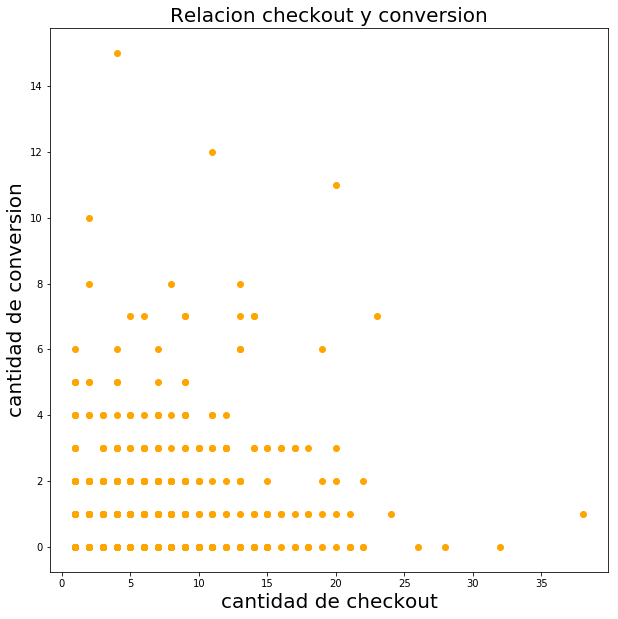

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(x="checkout", y="conversion", 
                    data=people_and_events, color="orange")
plt.title("Relacion checkout y conversion", fontsize=20)
plt.xlabel("cantidad de checkout", fontsize=20)
plt.ylabel("cantidad de conversion", fontsize=20)

Text(0,0.5,'cantidad de conversion')

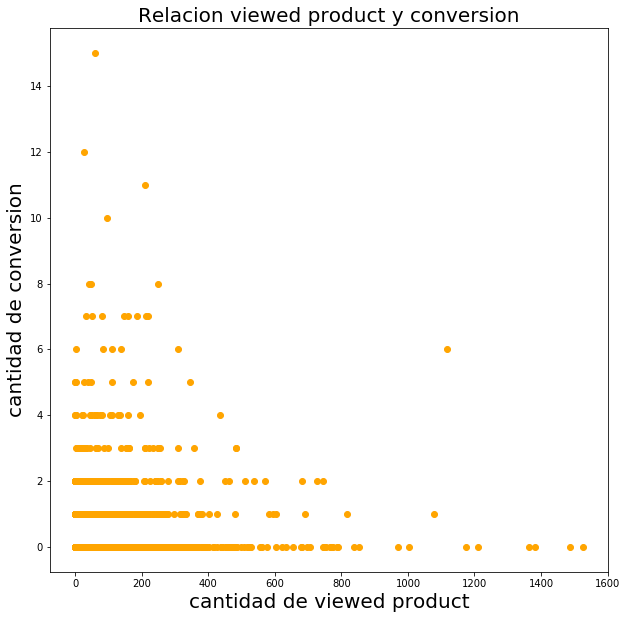

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(x="viewed product", y="conversion", 
                    data=people_and_events, color="orange")
plt.title("Relacion viewed product y conversion", fontsize=20)
plt.xlabel("cantidad de viewed product", fontsize=20)
plt.ylabel("cantidad de conversion", fontsize=20)

Text(0,0.5,'cantidad de checkout')

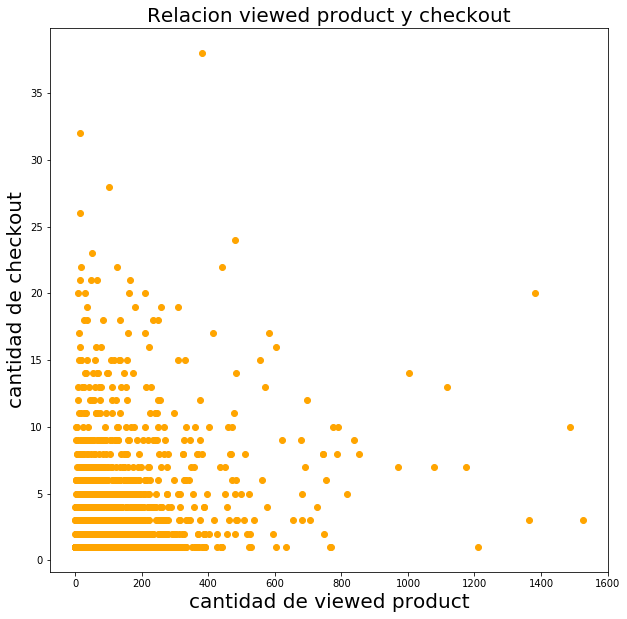

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(x="viewed product", y="checkout", 
                    data=people_and_events, color="orange")
plt.title("Relacion viewed product y checkout", fontsize=20)
plt.xlabel("cantidad de viewed product", fontsize=20)
plt.ylabel("cantidad de checkout", fontsize=20)

Text(0,0.5,'cantidad de conversion')

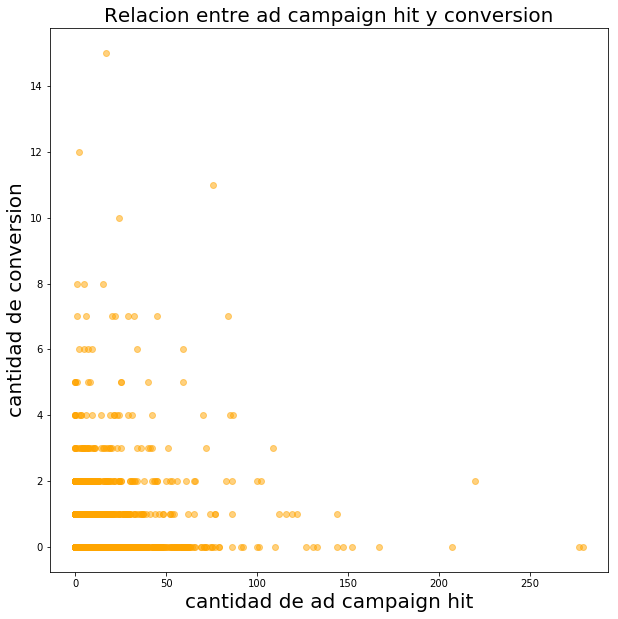

In [24]:
plt.figure(figsize=(10,10))
plt.scatter(x="ad campaign hit", y="conversion", 
                    data=people_and_events, color="orange")
plt.title("Relacion entre ad campaign hit y conversion", fontsize=20)
plt.xlabel("cantidad de ad campaign hit", fontsize=20)
plt.ylabel("cantidad de conversion", fontsize=20)

#spammear a alguien con anuncios no tiene sentido

Text(0,0.5,'cantidad de checkout')

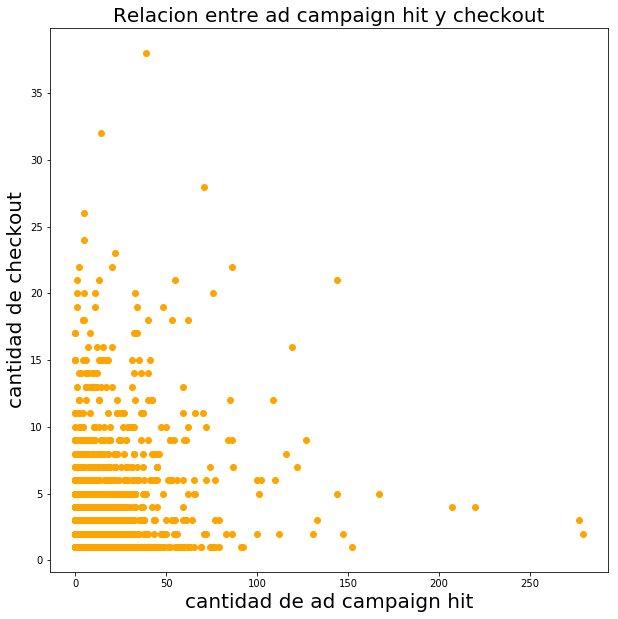

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(x="ad campaign hit", y="checkout", 
                    data=people_and_events, color="orange")
plt.title("Relacion entre ad campaign hit y checkout", fontsize=20)
plt.xlabel("cantidad de ad campaign hit", fontsize=20)
plt.ylabel("cantidad de checkout", fontsize=20)

#spammear a alguien con anuncios no tiene sentido

Text(0,0.5,'cantidad de conversion')

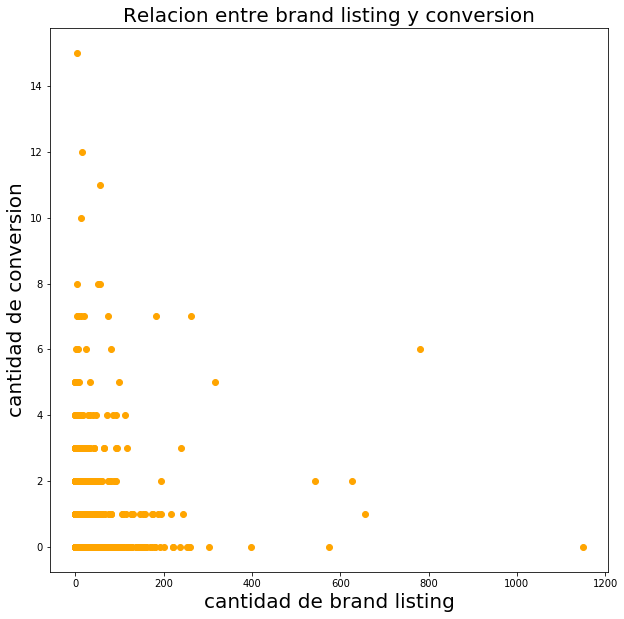

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(x="brand listing", y="conversion", 
                    data=people_and_events, color="orange")
plt.title("Relacion entre brand listing y conversion", fontsize=20)
plt.xlabel("cantidad de brand listing", fontsize=20)
plt.ylabel("cantidad de conversion", fontsize=20)


Text(0,0.5,'cantidad de conversion')

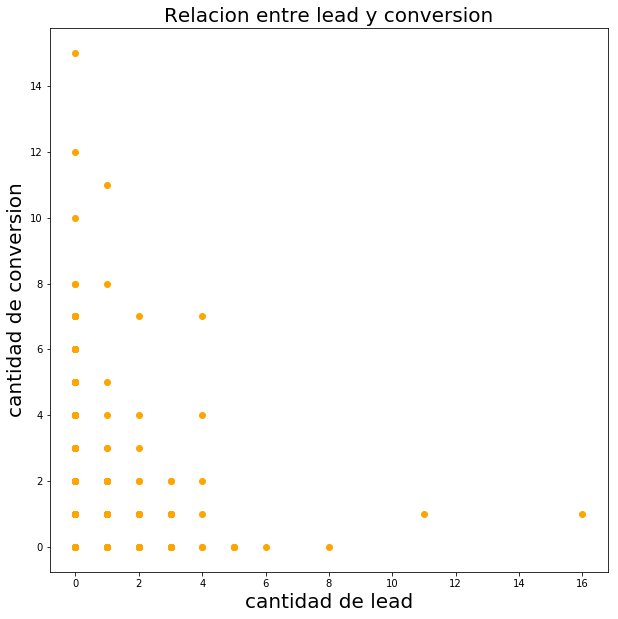

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(x="lead", y="conversion", 
                    data=people_and_events, color="orange")
plt.title("Relacion entre lead y conversion", fontsize=20)
plt.xlabel("cantidad de lead", fontsize=20)
plt.ylabel("cantidad de conversion", fontsize=20)


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'plt.scatter(x="total", y="ad campaign hit", \n                    data=people_and_events, color="orange")\nplt.title("Relacion entre total de eventos y ad campaign hit", fontsize=20)\nplt.xlabel("cantidad de total de eventos", fontsize=20)\nplt.ylabel("cantidad de ad campaign hit", fontsize=20)\n'

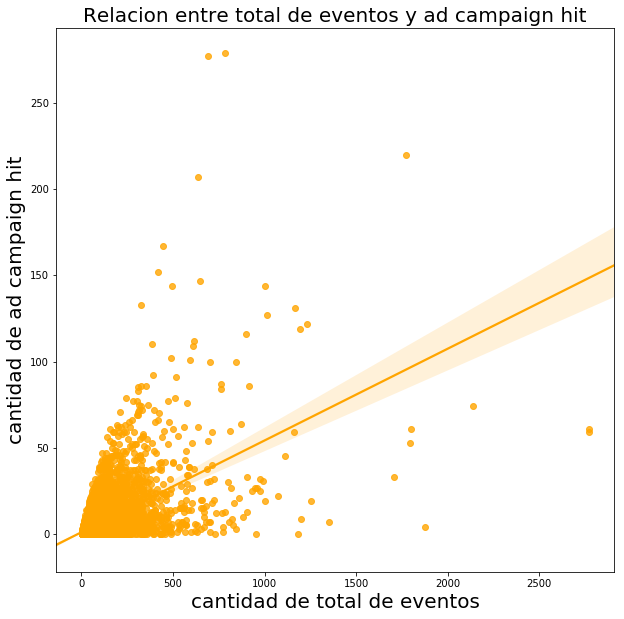

In [14]:
plt.figure(figsize=(10,10))
g = sns.regplot(x="total", y="ad campaign hit", 
                    data=people_and_events, color="orange")
g.set_title("Relacion entre total de eventos y ad campaign hit", fontsize=20)
g.set_xlabel("cantidad de total de eventos", fontsize=20)
g.set_ylabel("cantidad de ad campaign hit", fontsize=20)


"""plt.scatter(x="total", y="ad campaign hit", 
                    data=people_and_events, color="orange")
plt.title("Relacion entre total de eventos y ad campaign hit", fontsize=20)
plt.xlabel("cantidad de total de eventos", fontsize=20)
plt.ylabel("cantidad de ad campaign hit", fontsize=20)
"""

Text(0,0.5,'cantidad de checkout')

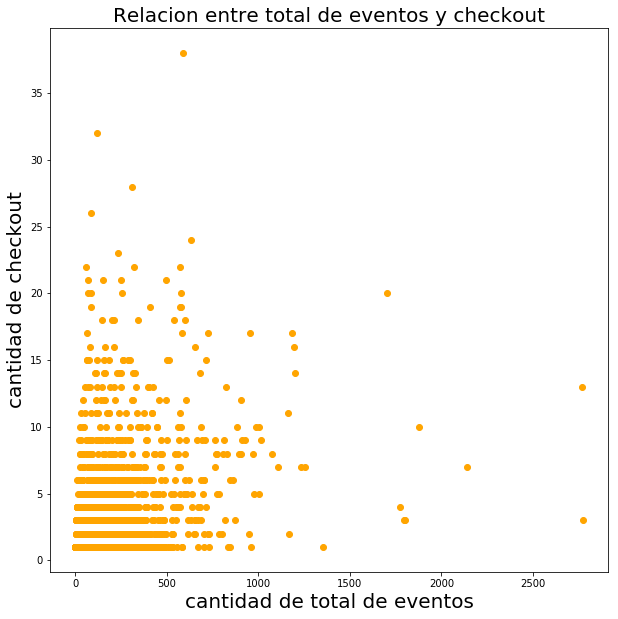

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(x="total", y="checkout", 
                    data=people_and_events, color="orange")
plt.title("Relacion entre total de eventos y checkout", fontsize=20)
plt.xlabel("cantidad de total de eventos", fontsize=20)
plt.ylabel("cantidad de checkout", fontsize=20)

Text(0,0.5,'cantidad de conversion')

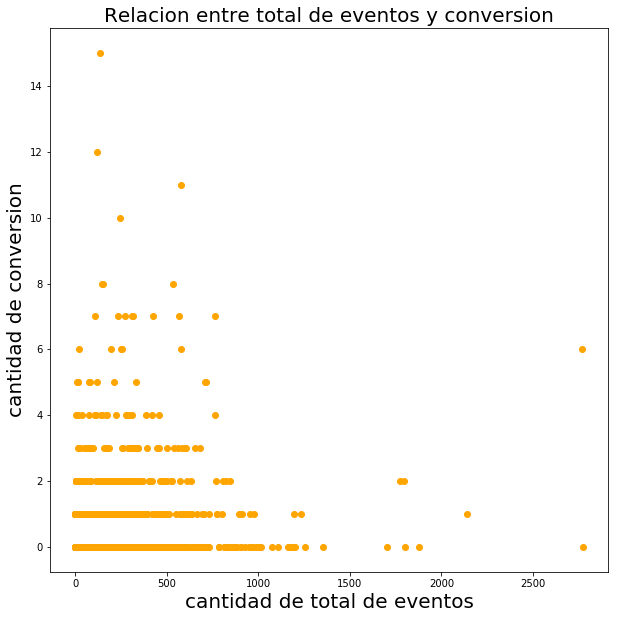

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(x="total", y="conversion", 
                    data=people_and_events, color="orange")
plt.title("Relacion entre total de eventos y conversion", fontsize=20)
plt.xlabel("cantidad de total de eventos", fontsize=20)
plt.ylabel("cantidad de conversion", fontsize=20)


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'plt.figure(figsize=(10,10))\nplt.scatter(x="total", y="viewed product", \n                    data=people_and_events, color="orange")\nplt.title("Relacion entre total de eventos y viewed product", fontsize=20)\nplt.xlabel("cantidad de total de eventos", fontsize=20)\nplt.ylabel("cantidad de viewed product", fontsize=20)'

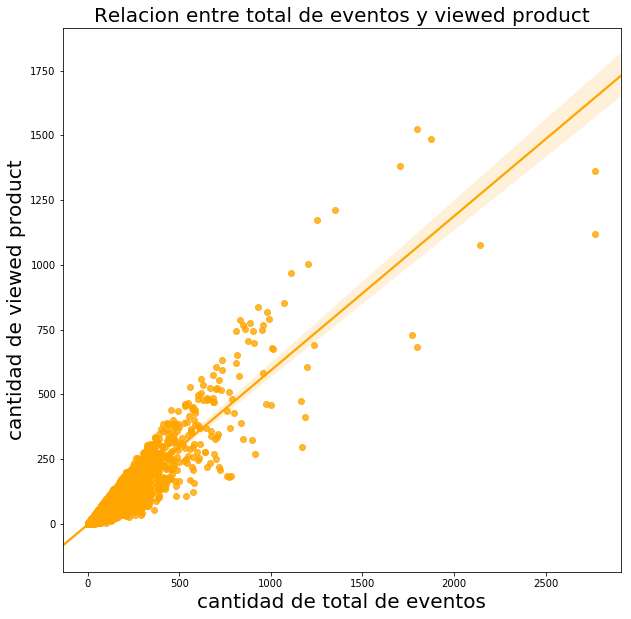

In [17]:
plt.figure(figsize=(10,10))
g = sns.regplot(x="total", y="viewed product", 
                    data=people_and_events, color="orange")
g.set_title("Relacion entre total de eventos y viewed product", fontsize=20)
g.set_xlabel("cantidad de total de eventos", fontsize=20)
g.set_ylabel("cantidad de viewed product", fontsize=20)

"""plt.figure(figsize=(10,10))
plt.scatter(x="total", y="viewed product", 
                    data=people_and_events, color="orange")
plt.title("Relacion entre total de eventos y viewed product", fontsize=20)
plt.xlabel("cantidad de total de eventos", fontsize=20)
plt.ylabel("cantidad de viewed product", fontsize=20)"""


In [18]:
people_and_events["tienenConversion"] = people_and_events["conversion"]>0

Text(0,0.5,'')

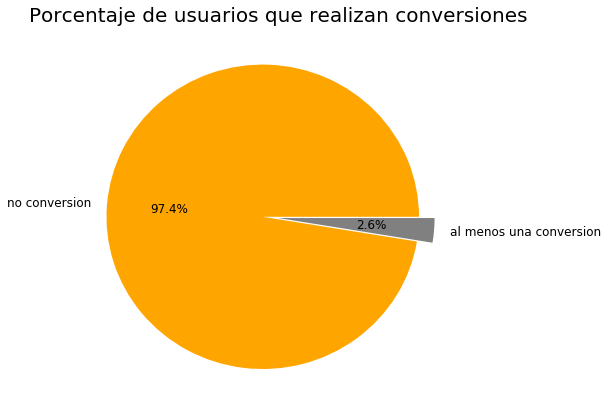

In [19]:
people_and_events["tienenConversion"]= people_and_events["tienenConversion"].replace(to_replace=True,value="al menos una conversion")
people_and_events["tienenConversion"]= people_and_events["tienenConversion"].replace(to_replace=False,value="no conversion")
conversioncontar = people_and_events["tienenConversion"].value_counts()
graficoConversionVsNoConversions = conversioncontar.plot(kind='pie',autopct='%1.1f%%',figsize=(7,7),fontsize=12,colors=['orange','gray'],explode=(0.1, 0))
graficoConversionVsNoConversions.set_title("Porcentaje de usuarios que realizan conversiones",fontsize=20)
graficoConversionVsNoConversions.set_ylabel("")

### Ahora analizo adentro de ese porcentaje que realizo una conversion, cuantos realizaron mas de 2

In [20]:
PersonasConAlMenosUnaConversion = people_and_events.loc[people_and_events["conversion"]>0,"conversion"]

Text(0,0.5,'')

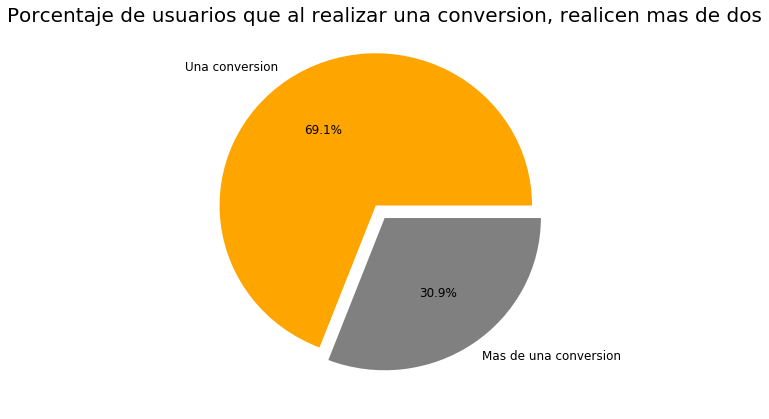

In [21]:
PersonasConAlMenosUnaConversionDF = PersonasConAlMenosUnaConversion.to_frame()
PersonasConAlMenosUnaConversionDF["tienenConvMayorA1"] = PersonasConAlMenosUnaConversionDF["conversion"]>1
PersonasConAlMenosUnaConversionDF["tienenConvMayorA1"]= PersonasConAlMenosUnaConversionDF["tienenConvMayorA1"].replace(to_replace=True,value="Mas de una conversion")
PersonasConAlMenosUnaConversionDF["tienenConvMayorA1"]= PersonasConAlMenosUnaConversionDF["tienenConvMayorA1"].replace(to_replace=False,value="Una conversion")
conversioncontar = PersonasConAlMenosUnaConversionDF["tienenConvMayorA1"].value_counts()
graficoConversionVsNoConversions = conversioncontar.plot(kind='pie',autopct='%1.1f%%',figsize=(7,7),fontsize=12,colors=['orange','gray'],explode=(0.1, 0))
graficoConversionVsNoConversions.set_title("Porcentaje de usuarios que al realizar una conversion, realicen mas de dos",fontsize=20)
graficoConversionVsNoConversions.set_ylabel("")

In [22]:
filtrarPorConversion = people_and_events.loc[people_and_events["conversion"]>0,["conversion","checkout"]]

In [23]:
filtrarPorConversion.describe(include='all')

event,conversion,checkout
count,716.000000,716.000000
mean,1.636872,4.406425
std,1.415986,4.253954
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,3.000000
75%,2.000000,6.000000
max,15.000000,38.000000
